In [1]:
import numpy as np
import gymnasium as gym
import matplotlib 
#matplotlib.use('Qt5Agg') # Activte it if you want external plot for any interaction
import matplotlib.pyplot as plt
import time
from moviepy import ImageSequenceClip # to generate gif
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
# -------------------------
# Initialize Taxi environment
# -------------------------
env = gym.make("Taxi-v3")  # Used for accessing env.P and state/action space
n_states = env.observation_space.n
n_actions = env.action_space.n

print(f'The size of state space: {n_states}')
print(f'the size of action space: {n_actions}')

The size of state space: 500
the size of action space: 6


---
---

## Space Info

Passenger locations 5 (R, G, Y, B, or "in taxi")

Destination locations 4 (R, G, Y, B)

observation space 5 rows × 5 columns × 5 passenger locations × 4 destinations = 500 states

The environment uses a single integer (0–499) to represent each state internally.


## Space Decoding

You can decode a state index using:

```python
env = gym.make("Taxi-v3")
state = 123  # some state index
decoded = env.unwrapped.decode(state)
print(decoded)  # returns (taxi_row, taxi_col, passenger_location, destination)
```

## Space Encoding

How to encode it back:

```python
encoded = env.unwrapped.encode(taxi_row, taxi_col, passenger_loc, destination)
```
---
---

gym.make() wraps environments in extra logic (like time limits). These wrappers don’t expose internal attributes like .P.

To access internal MDP properties (which only exist in classic Gym environments like Taxi)
use:

```python
env.unwrapped.P[s][a] # "s" for state and "a" for action
```
This returns :
 * **probability**: the transition probability
 * **next state**: an integer that represents the next state
 * **reward**: reward of transition from current state to the next state
 * **done**: a boolean for terminating the episode
 
<br><br>

Note that P[s][a] is the list of transitions and each transition is (probability, next_state, reward, terminated) e.g. Prob: 0.333, Next: 0, Reward: 0.0, Done: False

In [3]:
# -------------------------
# Value Iteration Parameters
# -------------------------
gamma = 0.99
theta = 1e-5
max_iterations = 1000


In [4]:
# -------------------------
# Value Iteration Algorithm
# -------------------------
def value_iteration(env, gamma=0.99, theta=1e-5):
    V = np.zeros(env.observation_space.n) # V keeps the values for each state
    track_error =[]
    for i in range(max_iterations):
        delta = 0
        for s in range(env.observation_space.n):
            q_sa = []
            for a in range(env.action_space.n):
                q = 0
                # P[s][a] == list of transitions
                # each transition is (probability, next_state, reward, terminated)
                # e.g. Prob: 0.333, Next: 0, Reward: 0.0, Done: False
                for prob, next_state, reward, done in env.unwrapped.P[s][a]: 
                    # for transitions = P[0][1]
                    # Prob: 0.333, Next: 0, Reward: 0.0, Done: False
                    # Prob: 0.333, Next: 1, Reward: 0.0, Done: False
                    # Prob: 0.333, Next: 4, Reward: 0.0, Done: False
                    q += prob * (reward + gamma * V[next_state])
                q_sa.append(q)
            max_q = max(q_sa)
            delta = max(delta, np.abs(max_q - V[s]))
            track_error.append(delta)
            V[s] = max_q
        if delta < theta:
            print(f"Value iteration converged after {i+1} iterations.")
            break

    policy = np.zeros(env.observation_space.n, dtype=int)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                q_sa[a] += prob * (reward + gamma * V[next_state])
        policy[s] = np.argmax(q_sa)

    return V, policy, track_error

In [5]:
# Run value iteration
V, policy, error_history = value_iteration(env, gamma, theta)

Value iteration converged after 725 iterations.


In [6]:
# -------------------------
# Action Symbols for Display
# -------------------------
action_arrows = {
    0: '↑',  # South
    1: '↓',  # North
    2: '→',  # East
    3: '←',  # West
    4: 'P',  # Pickup
    5: 'D',  # Dropoff
}

In [7]:
# -------------------------
# Print the Optimal Policy
# -------------------------
def print_policy(policy):
    print("\nOptimal Policy:")
    for s in range(n_states):
        print(f"State {s}: {action_arrows[policy[s]]}")

print_policy(policy)


Optimal Policy:
State 0: P
State 1: P
State 2: P
State 3: P
State 4: ↑
State 5: ↑
State 6: ↑
State 7: ↑
State 8: ↑
State 9: ↑
State 10: ↑
State 11: ↑
State 12: ↑
State 13: ↑
State 14: ↑
State 15: ↑
State 16: D
State 17: ↑
State 18: ↑
State 19: ↑
State 20: ←
State 21: ←
State 22: ←
State 23: ←
State 24: ↑
State 25: ↑
State 26: ↑
State 27: ↑
State 28: ↑
State 29: ↑
State 30: ↑
State 31: ↑
State 32: ↑
State 33: ↑
State 34: ↑
State 35: ↑
State 36: ←
State 37: ↑
State 38: ↑
State 39: ↑
State 40: ↑
State 41: ↑
State 42: ↑
State 43: ↑
State 44: →
State 45: →
State 46: →
State 47: →
State 48: ↑
State 49: ↑
State 50: ↑
State 51: ↑
State 52: ↑
State 53: ↑
State 54: ↑
State 55: ↑
State 56: ↑
State 57: →
State 58: ↑
State 59: ↑
State 60: ↑
State 61: ↑
State 62: ↑
State 63: ↑
State 64: →
State 65: →
State 66: →
State 67: →
State 68: ↑
State 69: ↑
State 70: ↑
State 71: ↑
State 72: ↑
State 73: ↑
State 74: ↑
State 75: ↑
State 76: ↑
State 77: →
State 78: ↑
State 79: ↑
State 80: ↑
State 81: ↑
State 82:

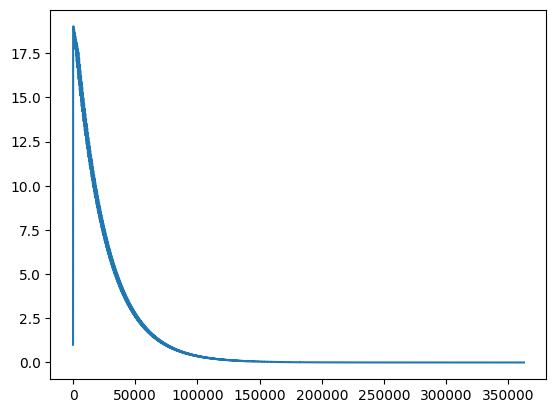

In [8]:
plt.plot(range(1, len(error_history)+1), error_history)
plt.show()

In [9]:
# -------------------------
# Render Policy Using RGB Frames
# -------------------------



def create_gif(frames, filename, fps=5):
    """Creates a GIF animation from a list of frames."""
    clip = ImageSequenceClip(frames, fps=fps)
    clip.write_gif(filename, fps=fps)
    
    
def run_multi_episodes(env, policy, num_episodes=3):
    total_frames = []
    total_reward = []
    total_steps = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        steps = 0
        while not done and steps < 50: # A good solution is obtained less than 50 actions
            # Capture the rendered frame
            frame = env.render()
            total_frames.append(frame)

            # Take action from learned policy
            action = policy[state]
            state, reward, done, truncated, info = env_vis.step(action)
            episode_reward += reward
            steps += 1
        total_reward.append(episode_reward)
        total_steps.append(steps)
    return total_frames, total_steps, total_reward



In [10]:
env_vis = gym.make("Taxi-v3", render_mode="rgb_array")


total_frames, total_steps, total_reward = run_multi_episodes(env_vis, policy, num_episodes=4)
print('pls wait, we are generating gif...')
# Decrease fps to see movement clearly.
create_gif(total_frames, f"Taxi-value-iteration.gif", fps=2) 

print(f"\n\nThere are {len(total_steps)} episodes:\n")
for i,t in enumerate(zip(total_steps,total_reward)):
    print(f'    -- Epsiode {i}      length {t[0]}      return {t[1]}')

pls wait, we are generating gif...
MoviePy - Building file Taxi-value-iteration.gif with imageio.




There are 4 episodes:

    -- Epsiode 0      length 13      return 8
    -- Epsiode 1      length 18      return 3
    -- Epsiode 2      length 12      return 9
    -- Epsiode 3      length 16      return 5


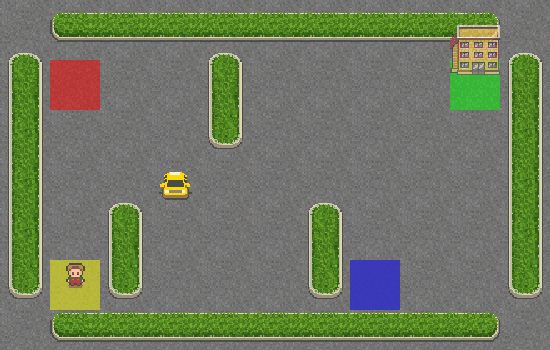

In [11]:


Image(filename='./Taxi-value-iteration.gif')
